<a href="https://colab.research.google.com/github/Meeta14/Shala-Assignments/blob/master/Assignment_ML_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv'
titanic_data = pd.read_csv(url)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.shape

(891, 12)

In [4]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
titanic_data['Age'].fillna(value = titanic_data['Age'].mean(), inplace = True)

print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [0]:
X = titanic_data.drop(['Name','Cabin','Ticket'], axis = 1)
X = pd.get_dummies(X)

In [22]:
X = X.dropna()
print(X.shape)
print(X.isna().sum())

(891, 12)
PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64


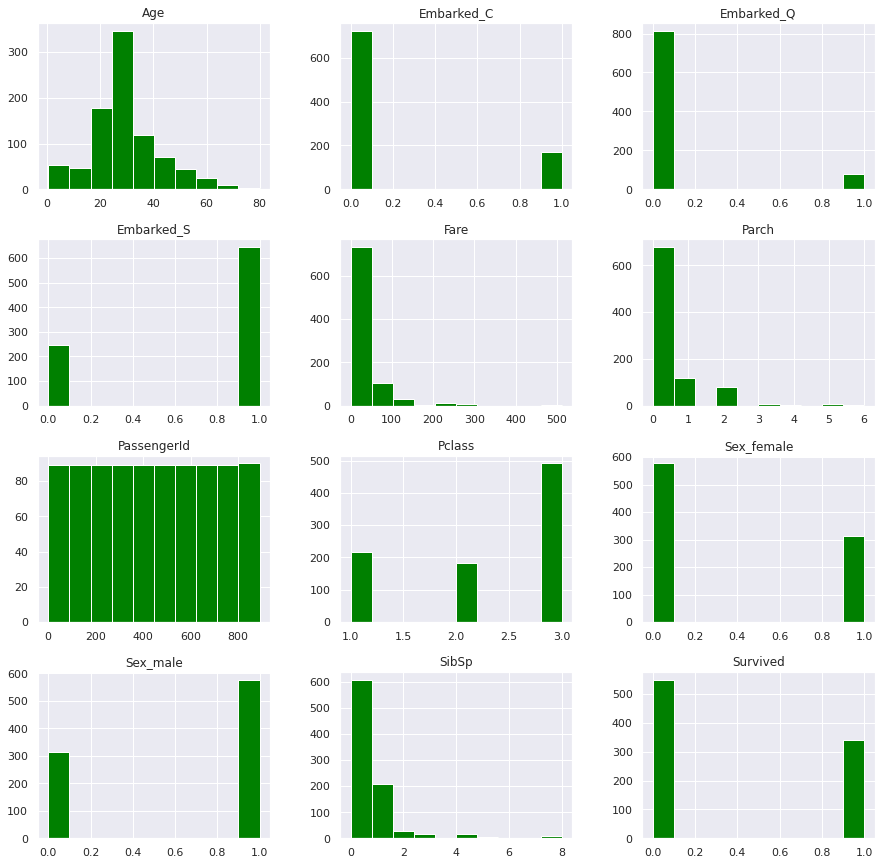

In [23]:
sns.set(style="darkgrid")
X.hist(figsize=(15,15),color='Green')
plt.show()

In [0]:
# survived, age, sibsp, parch, fare, body
def normalize (x):
    output = (x - x.mean())/ (x.std())
    return output

X['Age'] = normalize(X['Age'])
X['Fare'] = normalize(X['Fare'])

In [13]:
X.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,-0.592148,1,0,-0.502163,0,1,0,0,1
1,2,1,1,0.638430,1,0,0.786404,1,0,1,0,0
2,3,1,3,-0.284503,0,0,-0.488580,1,0,0,0,1
3,4,1,1,0.407697,1,0,0.420494,1,0,0,0,1
4,5,0,3,0.407697,0,0,-0.486064,0,1,0,0,1


In [0]:
y = X.Survived
X = X.drop(['PassengerId','Survived'], axis=1)

---
## Decision Tree
---

In [0]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score, roc_curve

from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [0]:
# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [0]:
depth = [9, 10, 11, 12, 13, 14, 16, 18, 21]
train= []
test = []
for i in (depth):
    clf = DecisionTreeClassifier(max_depth= i,random_state = 0)
    clf.fit(X_train, y_train)
    y_pred_dt = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    test.append(clf.score(X_test, y_test))
    train.append(clf.score(X_train, y_train))
    # print('Depth of the Decision Tree is:-', i)
    # print('Accuracy of Decision Tree regression classifier on test set: {:.4f}'.format(clf.score(X_test, y_test)))
    # print('Accuracy of Decision Tree regression classifier on train set: {:.4f}'.format(clf.score(X_train, y_train)))
    # print('\n')

In [29]:
print(train)
print(test)

[0.922752808988764, 0.9339887640449438, 0.9410112359550562, 0.9508426966292135, 0.9578651685393258, 0.9634831460674157, 0.9719101123595506, 0.9775280898876404, 0.9831460674157303]
[0.8156424581005587, 0.8379888268156425, 0.8324022346368715, 0.8435754189944135, 0.8156424581005587, 0.8156424581005587, 0.8044692737430168, 0.7988826815642458, 0.8044692737430168]


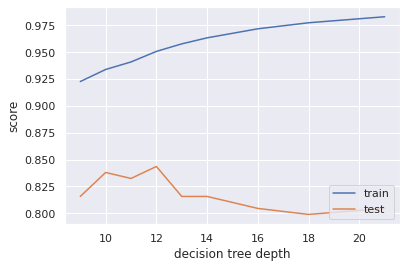

In [32]:
plt.plot(depth, train, label='train')
plt.plot(depth, test, label = 'test')
plt.ylabel('score')
plt.xlabel('decision tree depth')
plt.legend(loc='lower right')
plt.show()

In [33]:
print('from above graph it is clear that maxinum accuracy occurs at depth = 12')
clf = DecisionTreeClassifier(max_depth= 12, random_state = 111)
clf.fit(X_train, y_train)
y_pred_dt = clf.predict(X_test)

print('Depth of the Decision Tree is:-', clf.get_depth())
print('Accuracy of Decision Tree regression classifier on test set: {:.4f}'.format(clf.score(X_test, y_test)))
print('Accuracy of Decision Tree regression classifier on train set: {:.4f}'.format(clf.score(X_train, y_train)))

from above graph it is clear that maxinum accuracy occurs at depth = 12
Depth of the Decision Tree is:- 12
Accuracy of Decision Tree regression classifier on test set: 0.8212
Accuracy of Decision Tree regression classifier on train set: 0.9508


In [34]:
print('roc_auc_score of Decision Tree regression classifier on test set: {:.4f}'.format(roc_auc_score(y_test, y_pred_dt)))
print('\n')
print(confusion_matrix(y_test, y_pred_dt))
print("="*60)
print(classification_report(y_test, y_pred_dt))

roc_auc_score of Decision Tree regression classifier on test set: 0.7951


[[100  10]
 [ 22  47]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       110
           1       0.82      0.68      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



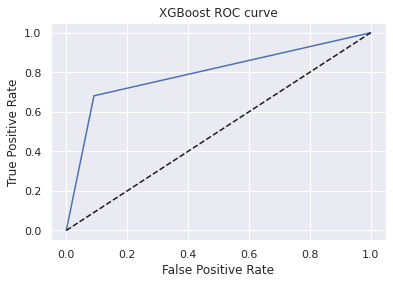

In [35]:
fper, tper, thresholds = roc_curve(y_test, y_pred_dt) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()

---
## Linear Regression
---

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

In [40]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1, solver='liblinear').fit(X_train,y_train)
# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**0.5

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

Linear Regression test set RMSE: 0.44


In [41]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**0.5

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 0.38


In [43]:
print('roc_auc_score of Decision Tree regression classifier on test set: {:.4f}'.format(roc_auc_score(y_test, y_pred_lr)))
print('\n')
print(confusion_matrix(y_test, y_pred_lr))
print("="*60)
print(classification_report(y_test, y_pred_lr))

roc_auc_score of Decision Tree regression classifier on test set: 0.7842


[[96 14]
 [21 48]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       110
           1       0.77      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



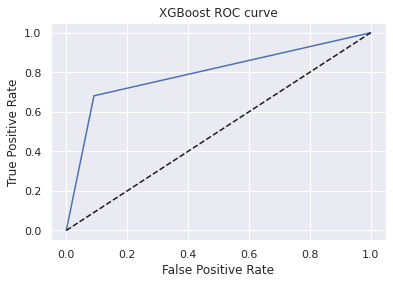

In [44]:
fper, tper, thresholds = roc_curve(y_test, y_pred_dt) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()

---
## Voting Classifier
---

In [0]:
# Import functions to compute accuracy and split data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
# Set seed for reproducibility
SEED = 11

In [0]:
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= SEED)
# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
('K Nearest Neighbours', knn),
('Classification Tree', dt)]

In [47]:
import warnings
warnings.filterwarnings("ignore")
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
  #fit clf to the training set
  clf.fit(X_train, y_train)
  # Predict the labels of the test set
  y_pred = clf.predict(X_test)
  # Evaluate the accuracy of clf on the test set
  print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.836
K Nearest Neighbours : 0.840
Classification Tree : 0.776


In [48]:
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print("Voting classifier: ", round(accuracy_score(y_test, y_pred),3))

Voting classifier:  0.843


In [51]:
print('roc_auc_score of Decision Tree regression classifier on test set: {:.4f}'.format(roc_auc_score(y_test, y_pred)))
print('\n')
print(confusion_matrix(y_test, y_pred))
print("="*60)
print(classification_report(y_test, y_pred))

roc_auc_score of Decision Tree regression classifier on test set: 0.8184


[[158  18]
 [ 24  68]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       176
           1       0.79      0.74      0.76        92

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.84      0.84      0.84       268



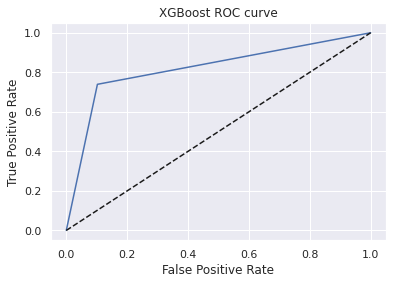

In [52]:
fper, tper, thresholds = roc_curve(y_test, y_pred) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()

---
## Bagging
---

In [0]:
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
SEED = 11

In [54]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=12, min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1) # n_jobs=-1 means that all the CPU cores are used in computation. 

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.825


In [56]:
print('roc_auc_score of Decision Tree regression classifier on test set: {:.4f}'.format(roc_auc_score(y_test, y_pred)))
print('\n')
print(confusion_matrix(y_test, y_pred))
print("="*60)
print(classification_report(y_test, y_pred))

roc_auc_score of Decision Tree regression classifier on test set: 0.8016


[[154  22]
 [ 25  67]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       176
           1       0.75      0.73      0.74        92

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



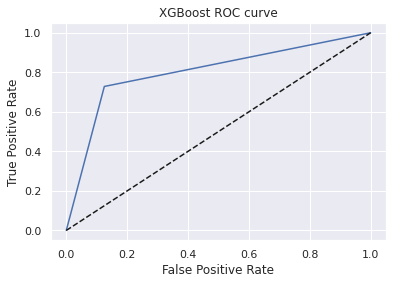

In [57]:
fper, tper, thresholds = roc_curve(y_test, y_pred) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()

---
## Random Forests
---

In [0]:
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 11

In [0]:
# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)
# Fit 'rf' to the training set
rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

In [60]:
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.38


In [65]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
